# Random Mixtures

The function `mix` takes an initial distribution, a function outputting a distribution, a number of iterations, and a parameter. The function `mix_array` returns an array including all intermediate values. Both run at about the same speed, `mix_array` can run more iterations without a stack overflow.

In [1]:
using Distributions
using Random
using StatsPlots

In [2]:
function mix(init, mix, n; α = 1)
  distr = init
  for i in 1:n
    x = rand(distr)
    distr = MixtureModel([distr, mix(x)], [i/(α+i), α/(α+i)])
  end
  return distr
end

function mix_array(init::T, mix, n; α = 1) where {T <: Distribution}
  ar = Vector(undef, n)
  ar[1] = init
  for i in 2:n
    x = rand(ar[i-1])
    ar[i] = MixtureModel([ar[i-1], mix(x)], [(i-1)/(α+i-1), α/(α+i-1)])
  end
  return ar
end;

## Dirichlet Processes

In [3]:
dirichlet = mix(Chisq(3), x -> Normal(x, 0), 4000; α = 1)
dirichlet_samples = [rand(Chisq(3), 10000) rand(dirichlet, 10000)];

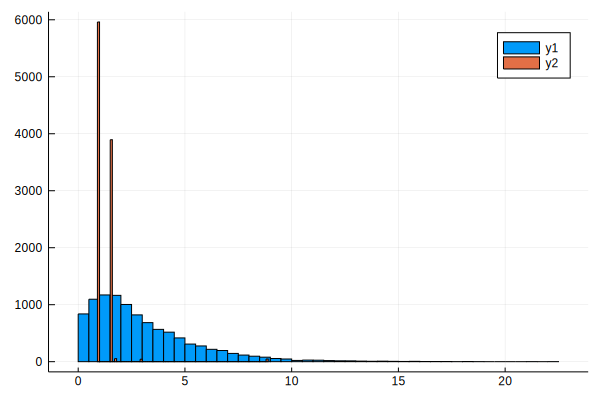

In [4]:
plot(dirichlet_samples, seriestype = :histogram)

## Mixing Normal Distributions

In [5]:
function withalpha(a)
  dists = mix_array(Uniform(-50,50), x -> Normal(x,1), 2048, α = a)
  samples = (x -> rand(dists[2^x],40000)).(0:11)
  return samples
end;

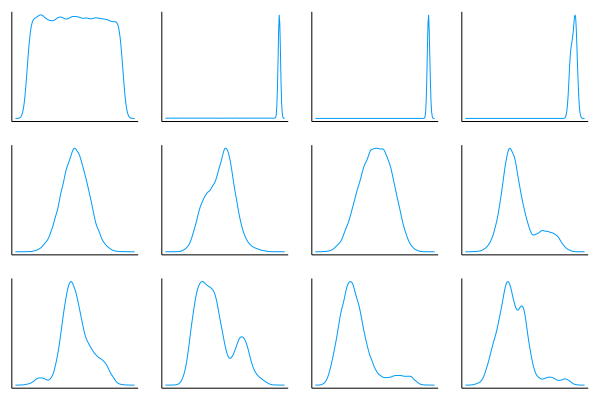

In [6]:
density(withalpha(10), layout = (3,4), legend = false, ticks = false)

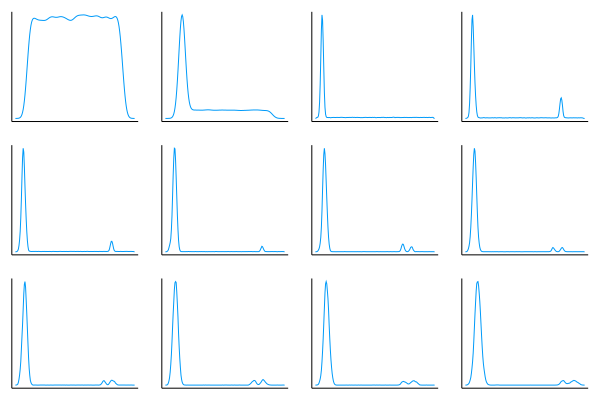

In [7]:
density(withalpha(1), layout = (3,4), legend = false, ticks = false)

## Mixing in Pareto Distribution

In [20]:
pareto = mix_array(Uniform(1,2), x -> Pareto(x,1), 2048, α = 1)
pareto_samples = (x -> rand(pareto[2^x],40000)).(0:11);

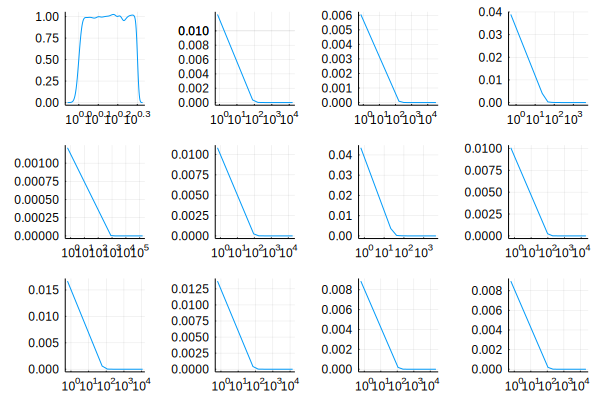

In [21]:
density(pareto_samples, layout = (3,4), legend = false, xaxis = :log)

## Starting with a uniform distribution

In [10]:
data1 = rand(mix(Product([Uniform(-15,15),Uniform(-15,15)]), x -> MvNormal(x,1), 2500, α = 0.4), 10000)
xs1 = data1[1,:]
ys1 = data1[2,:];

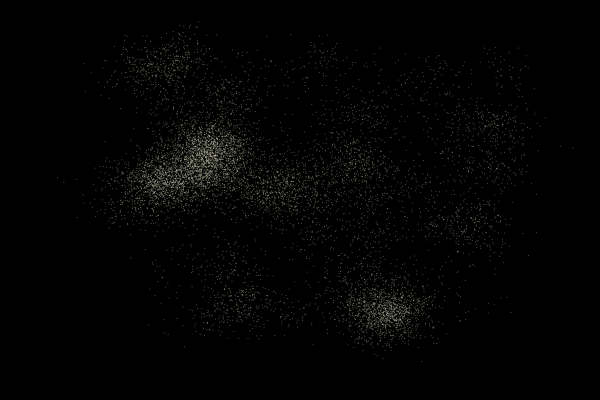

In [11]:
plot(xs1,
    ys1,
    seriestype = :scatter,
    markersize = 0.05,
    markerstrokewidth = 0,
    markercolor = :lightyellow,
    markeralpha = 0.4,
    background_color = :black,
    legend = false,
    grid = false,
    showaxis = false)

## Starting with a multivariate normal distribution

In [12]:
data2 = rand(mix(MvNormal(2,15), x -> MvNormal(x,1), 2500, α = 0.4), 10000)
xs2 = data2[1,:]
ys2 = data2[2,:];

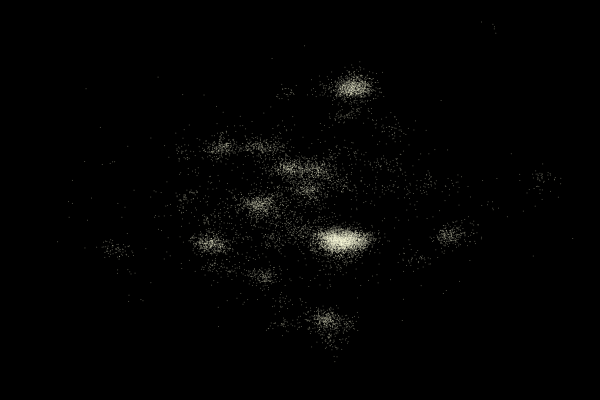

In [13]:
plot(xs2,
    ys2,
    seriestype = :scatter,
    markersize = 0.05,
    markerstrokewidth = 0,
    markercolor = :lightyellow,
    markeralpha = 0.4,
    background_color = :black,
    legend = false,
    grid = false,
    showaxis = false)